# Create a test dataset with a few users and books for simple tests
In this notebook, I'm going to choose a subset of my data for testing purposes. I'll select only the users who have rated less than 10 books.

In [9]:
from pathlib import Path
import pandas as pd
data_folder = Path.cwd().parent / 'data'
transformed_folder = data_folder / 'transformed'
USERS_PATH=Path(transformed_folder,"users.csv")
RATINGS_PATH=Path(transformed_folder,"ratings_filtered_some_set_to_0.csv")
BOOK_EMBEDDINGS=Path(transformed_folder,"book_embeddings.csv")
BOOKS_PATH=Path(transformed_folder,"books_final.csv")
random_state=43

In [2]:
#create a new folder for the output
output_folder = data_folder / 'test_datasets'
output_folder.mkdir(parents=True, exist_ok=True)

In [3]:
#load ratings
ratings = pd.read_csv(RATINGS_PATH)
ratings.head()

username        isbn  rating  user_id  book_id
0   Lee4an  1400097029       3        1     5556
1   Lee4an  0312424094       3        1     3638
2   Lee4an  031242440X       5        1     1796
3   Lee4an  0393328627       3        1      867
4   Lee4an  0385722206       0        1     2738

In [4]:
#filter out ratings 0
non_zero = ratings[ratings['rating']!=0]
#filter out users with more than 10 ratings
ratings_of_users_with_more_than_10 = non_zero.groupby('username').filter(lambda x: len(x) <= 10)


In [5]:
#load users
users = pd.read_csv(USERS_PATH)
users.head()

user_id        username     sex
0        1          Lee4an    male
1        2  Partypooper009  female
2        3       Jenna1021  female
3        4      ALMEHZA_02    male
4        5     Fakehashish  female

In [6]:
#join ratings and users
users_ratings= pd.merge(ratings_of_users_with_more_than_10, users, on='username', how='inner')
#choose 10 users at random
users_sample_names = users_ratings['username'].sample(10, random_state=random_state)#sample function does not allow duplicates
users_sample = users[users['username'].isin(users_sample_names)]
users_sample

user_id          username     sex
21016    21017      mellowgold15    male
27688    27689            reb234    male
30118    30119      AlredyReddit    male
36571    36572           storyja  female
37904    37905  xxgmoneymcballin    male
39282    39283    UndividedSplit    male
42689    42690           RKVIJAY    male
47147    47148        4anto2nioO    male
48051    48052        HarryBinks    male
52332    52333       SiansoShade  female

In [7]:
#get the ratings of the 10 users
ratings_sample = ratings[ratings['username'].isin(users_sample_names)]
ratings_sample.head()

username        isbn  rating  user_id  book_id
1544151  mellowgold15  0874774241       0    21017      406
1544152  mellowgold15  1844137872       5    21017      524
1544153  mellowgold15  071483355X       0    21017      580
1544154  mellowgold15  0446573647       0    21017     2162
1544155  mellowgold15  0060899190       5    21017     1495

In [16]:
#get the books that the 10 users have rated
books = pd.read_csv(BOOKS_PATH)
embeddings=pd.read_csv(BOOK_EMBEDDINGS).loc[:,['book_id','embeddings']]
books_embedded = pd.merge(books, embeddings, on='book_id', how='inner')
books_sample = books_embedded[books_embedded['isbn'].isin(ratings_sample['isbn'])]
books_sample.head()

book_id                                                url  \
0        1  https://www.goodreads.com/book/show/2767052-th...   
1        3  https://www.goodreads.com/book/show/41865.Twil...   
3        9  https://www.goodreads.com/book/show/960.Angels...   
4       12  https://www.goodreads.com/book/show/13335037-d...   
5       16  https://www.goodreads.com/book/show/2429135.Th...   

                             title        isbn  \
0                 The Hunger Games  0439023483   
1                         Twilight  0316015849   
3                  Angels & Demons  1416524797   
4                        Divergent  0062024035   
5  The Girl with the Dragon Tattoo  0670069019   

                                         description  \
0  Could you survive on your own in the wild, wit...   
1  About three things I was absolutely positive.F...   
3  World-renowned Harvard symbologist Robert Lang...   
4  In Beatrice Prior's dystopian Chicago world, s...   
5  Harriet Vanger, a scion of one of Sweden’s wea...   

                                            imageUrl  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   
5  https://images-na.ssl-images-amazon.com/images...   

                                              genres  \
0  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   
1  ['Romance', 'Supernatural', 'Paranormal Romanc...   
3  ['Thriller', 'Mystery', 'Mystery Thriller', 'N...   
4  ['Dystopia', 'Romance', 'Young Adult', 'Fictio...   
5  ['Thriller', 'Adult Fiction', 'Sweden', 'Myste...   

                   publisher                            author publishDate  \
0           Scholastic Press               ['Suzanne Collins']  2008-10-14   
1  Little, Brown and Company               ['Stephenie Meyer']  2006-09-06   
3               Pocket Books                     ['Dan Brown']  2006-04-01   
4      Katherine Tegen Books                 ['Veronica Roth']  2012-01-01   
5              Viking Canada  ['Stieg Larsson', 'Reg Keeland']  2008-09-23   

   goodreads_book_id language  \
0            2767052  English   
1              41865  English   
3                960  English   
4           13335037  English   
5            2429135  English   

                                         genres_list  \
0  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   
1  ['Romance', 'Supernatural', 'Paranormal Romanc...   
3  ['Thriller', 'Mystery', 'Mystery Thriller', 'N...   
4  ['Dystopia', 'Romance', 'Young Adult', 'Fictio...   
5  ['Thriller', 'Adult Fiction', 'Sweden', 'Myste...   

                        author_list  \
0               ['Suzanne Collins']   
1               ['Stephenie Meyer']   
3                     ['Dan Brown']   
4                 ['Veronica Roth']   
5  ['Stieg Larsson', 'Reg Keeland']   

                                          embeddings  
0  [ 6.91260546e-02  3.37063000e-02  1.24304350e-...  
1  [-5.31767942e-02  8.08431581e-02  3.38156447e-...  
3  [-3.81878093e-02  6.43994659e-04 -1.16051361e-...  
4  [-5.38942181e-02 -1.36163859e-02 -1.93154607e-...  
5  [-6.22970499e-02  4.77645248e-02  1.57136079e-...

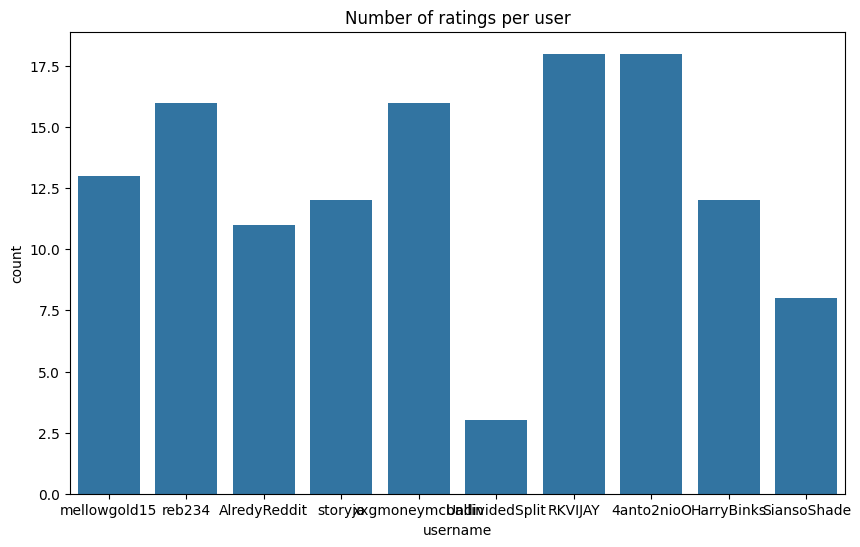

In [17]:
#visualize how many ratings each user has given
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(data=ratings_sample, x='username')
plt.title('Number of ratings per user')
plt.show()

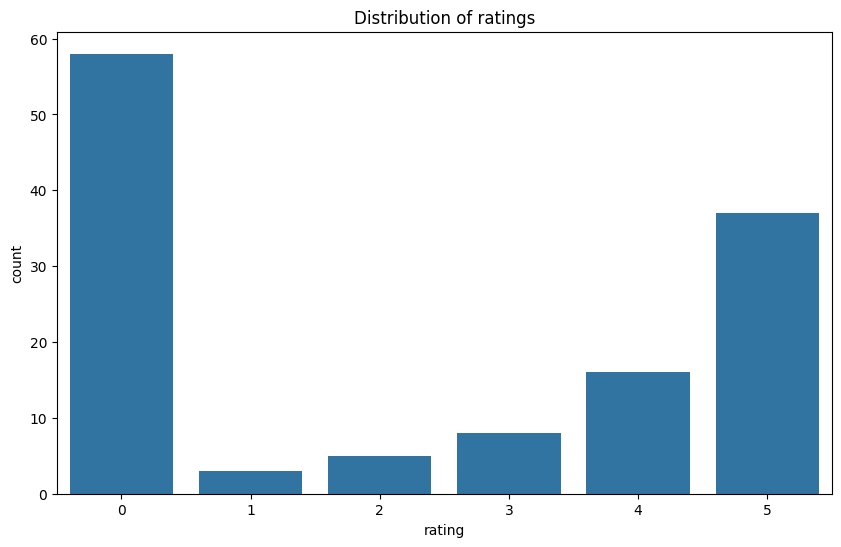

In [18]:
# visualize the distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(data=ratings_sample, x='rating')
plt.title('Distribution of ratings')
plt.show()

In [19]:
print("Number of ratings: ", len(ratings_sample))


Number of ratings:  127


In [20]:
print("Number of nonzero ratings: ", len(ratings_sample[ratings_sample.rating!=0]))

Number of nonzero ratings:  69


In [21]:
print("Number of users: ", len(users_sample))


Number of users:  10


In [22]:
#save the samples
ratings_sample.to_csv(output_folder /"original_db_reduced"/ 'ratings_sample.csv', index=False)
books_sample.to_csv(output_folder /"original_db_reduced"/ 'books_sample.csv', index=False)
users_sample.to_csv(output_folder /"original_db_reduced"/ 'users_sample.csv', index=False)
